In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

# Data Loading and Cleaning

In [2]:
data = pd.read_csv('C:\\Users\\frank\\OneDrive\\Desktop\\Kaggle\\data\\vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

data_cln = data[~data.isnull()['Year']]
data_cln = data_cln[~data_cln.isnull()['Publisher']]
data_cln.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [4]:
data_cln.shape

(15945, 11)

In [5]:
data_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15945 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15945 non-null  int64  
 1   Name          15945 non-null  object 
 2   Platform      15945 non-null  object 
 3   Year          15945 non-null  float64
 4   Genre         15945 non-null  object 
 5   Publisher     15945 non-null  object 
 6   NA_Sales      15945 non-null  float64
 7   EU_Sales      15945 non-null  float64
 8   JP_Sales      15945 non-null  float64
 9   Other_Sales   15945 non-null  float64
 10  Global_Sales  15945 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
data_cln['Year'] = data_cln['Year'].astype(int)

In [7]:
data_cln.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000
mean,8222.198369,2006.196927,0.269973,0.149259,0.079683,0.048990,0.548180
std,4776.235454,5.718780,0.830382,0.513081,0.314850,0.191804,1.581849
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4077.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8204.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.180000
75%,12332.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
data_cln.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,15945,15945,15945,15945
unique,11130,31,12,564
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2130,3132,1319


# What genre games have been made the most?

In [9]:
data_cln['Genre'].value_counts()

Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

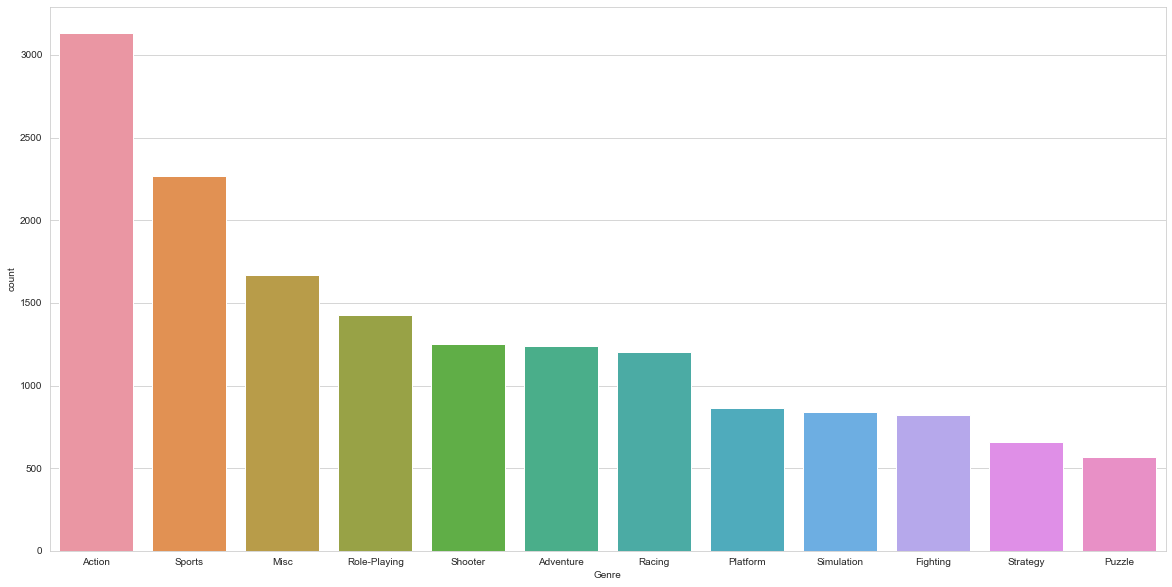

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Genre", data=data_cln, order = data_cln['Genre'].value_counts().index)
#plt.xticks(rotation=90)

# Which year had the most game release?

In [11]:
# Top ten years
data_cln['Year'].value_counts().head(10)

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

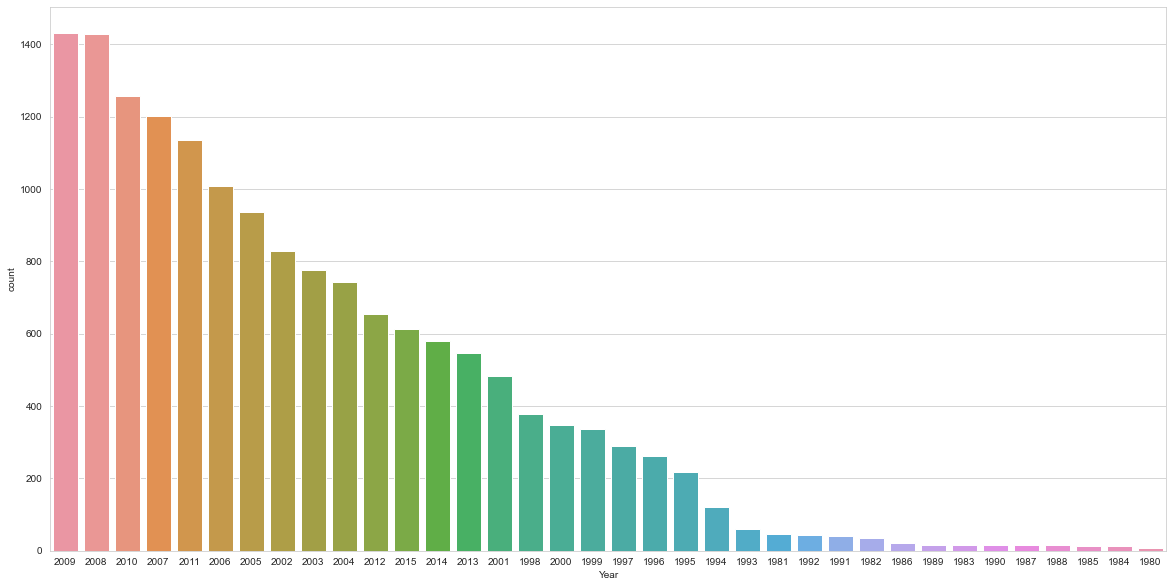

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=data_cln, order = data_cln['Year'].value_counts().index)
#plt.xticks(rotation=90)

# Top 5 years release by genre

<AxesSubplot:xlabel='Year', ylabel='count'>

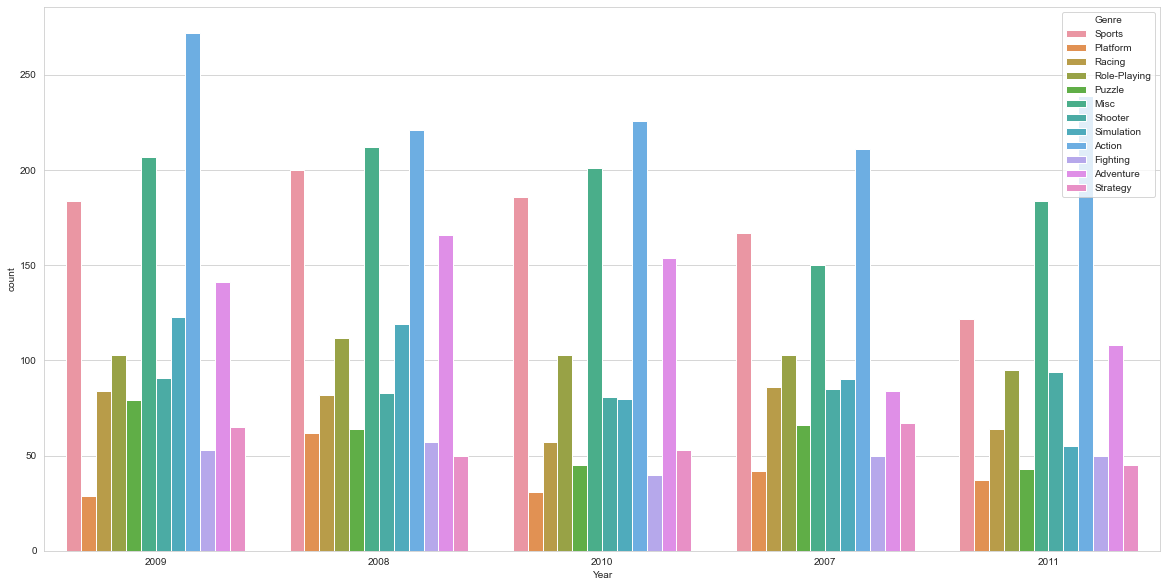

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=data_cln, hue='Genre', order=data_cln['Year'].value_counts().iloc[:5].index)
#plt.xticks(size=16, rotation=90)

# Which year had the highest sales worldwide?

In [14]:
data_year = data_cln.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

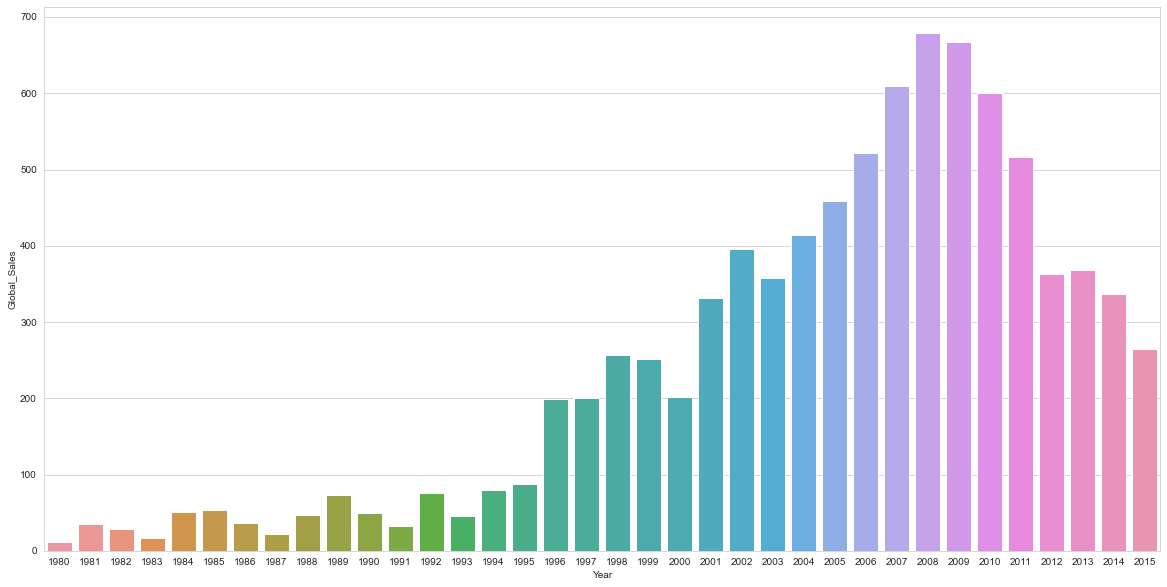

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)

In [16]:
data_year.sort_values(by = 'Global_Sales', ascending = False).head(10)

,Year,Global_Sales
28,2008,678.90
29,2009,667.30
27,2007,609.92
30,2010,600.29
26,2006,521.04
31,2011,515.80
25,2005,458.51
24,2004,414.01
22,2002,395.52
33,2013,368.11


# Which genere game has been released the most in a single year?

In [17]:
year_max_df = data_cln.groupby(['Year', 'Genre']).size().reset_index(name = 'count')
#Select the Genre type with max counts
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

#Drop duplicated genre types with same counts
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

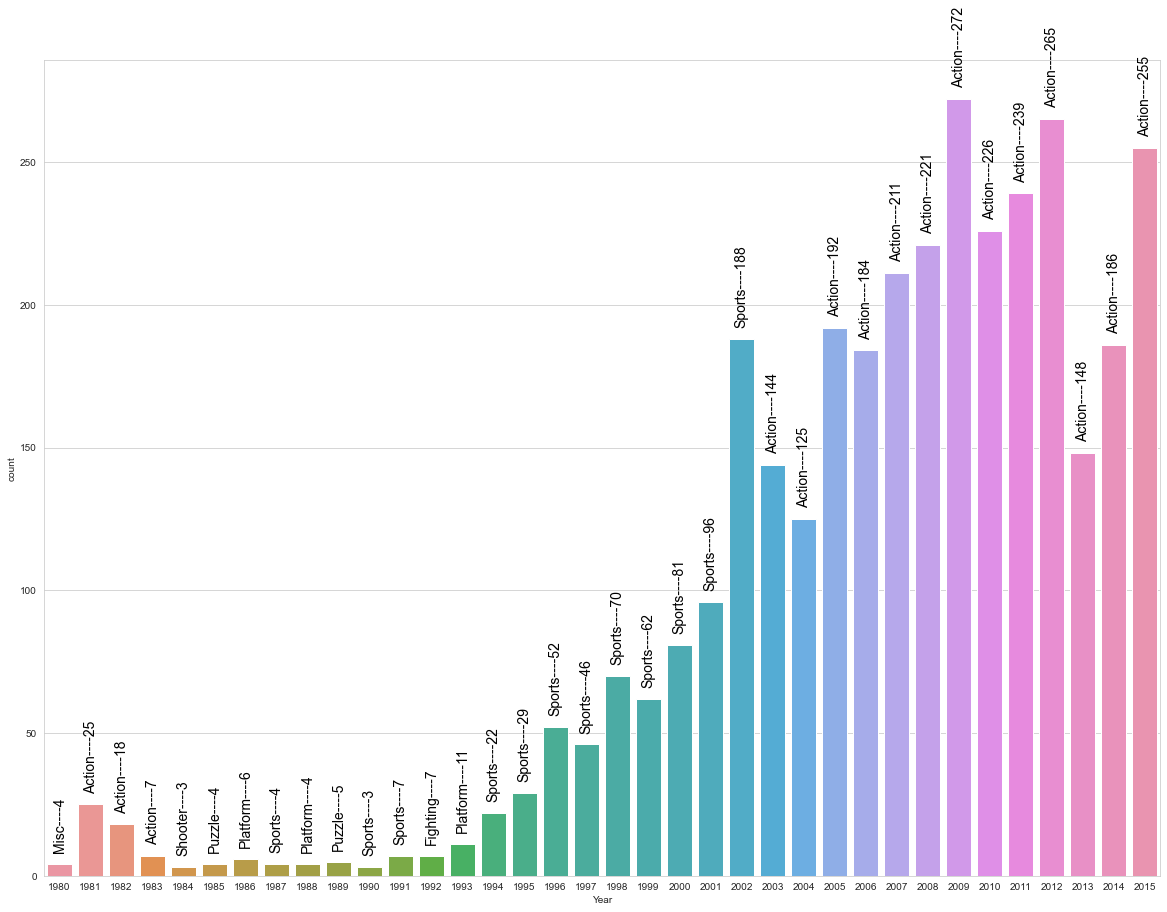

In [18]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)

for count, value in enumerate(year_max_genre['count'].values):
    g.text(count, value + 5, str(year_max_genre['Genre'].values[count] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")

#plt.xticks(rotation=90)
plt.show()

# Which genre game has sold the most in a single year?

In [19]:
year_sale_dx = data_cln.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

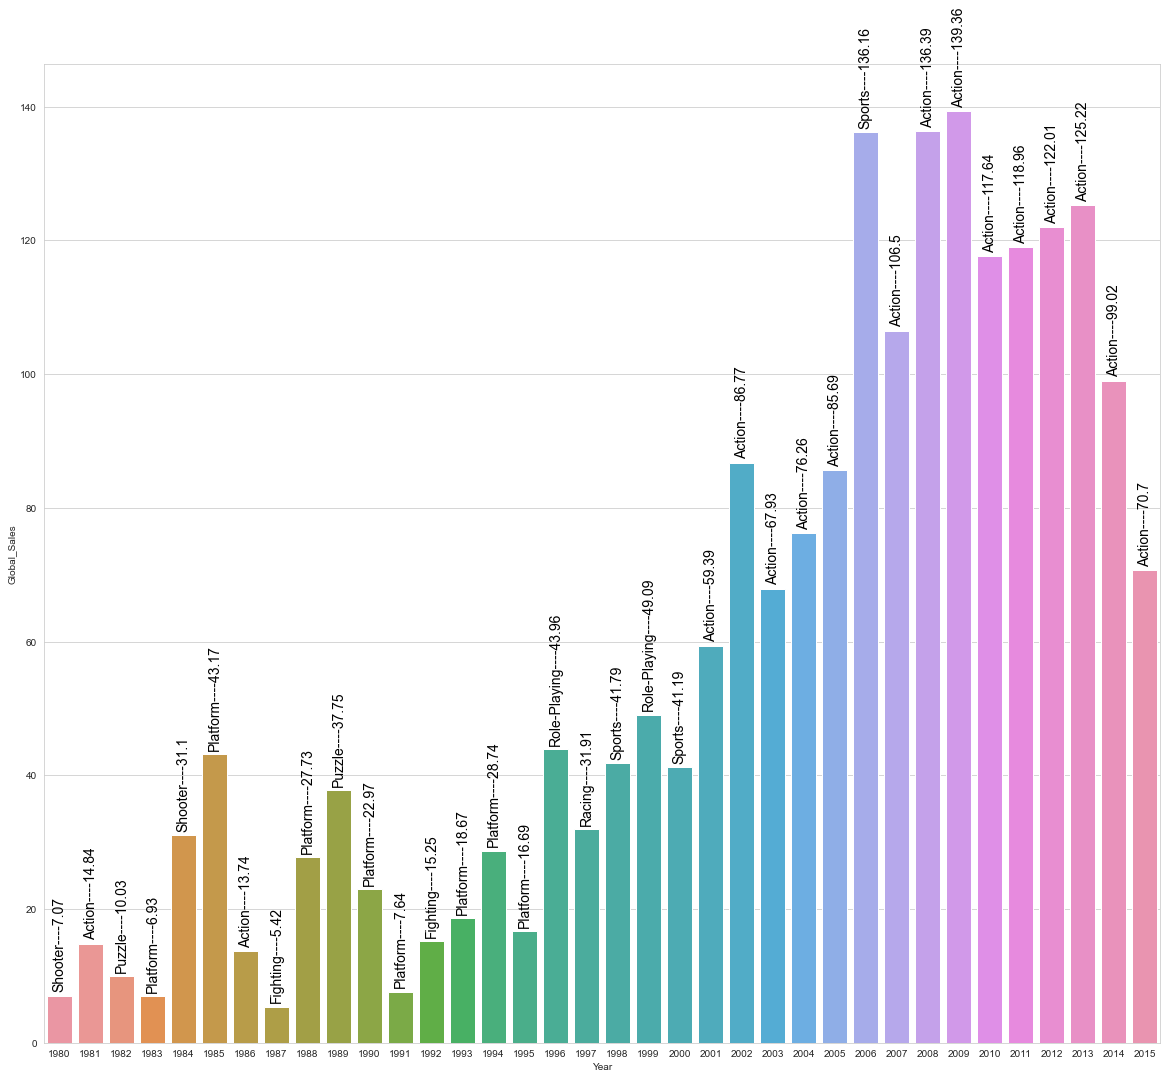

In [20]:
plt.figure(figsize=(20, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for count, value in enumerate(year_sale_max['Global_Sales']):
    g.text(count, value + 1, str(year_sale_max['Genre'].values[count] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")

#plt.xticks(rotation=90)
plt.show()

# Which genre game have the highest sale price globally

In [21]:
data_genre = data_cln.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

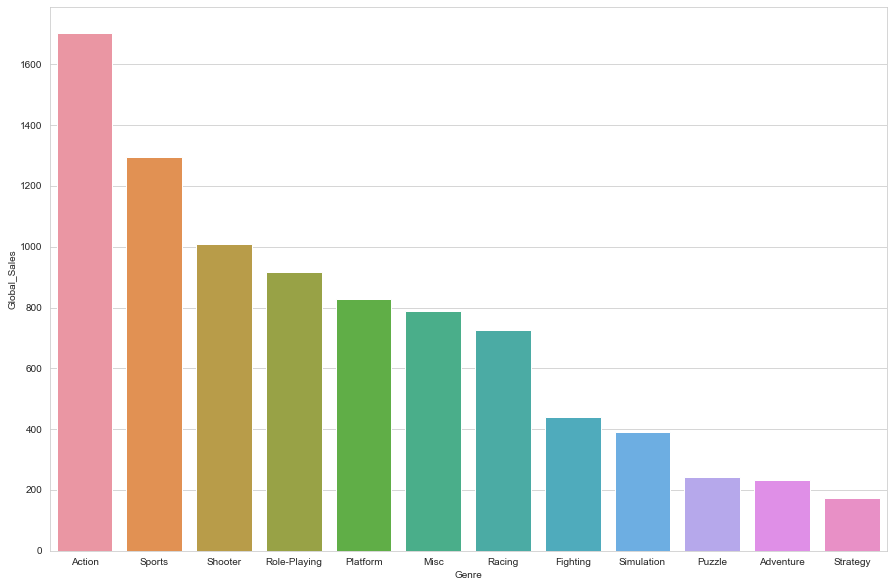

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
#plt.xticks(rotation=90)

# Which platform have the highest sale price globally

In [23]:
data_platform = data_cln.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
# data_platform

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

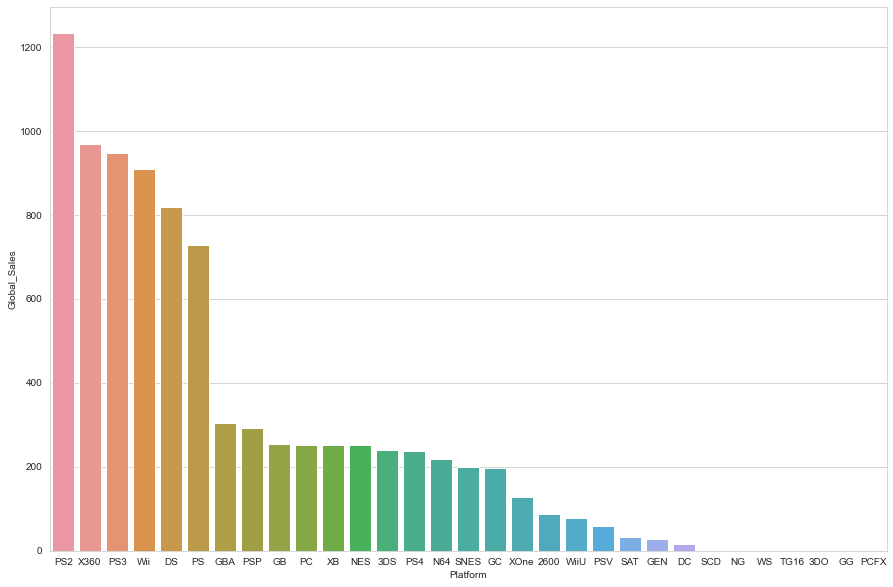

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
#plt.xticks(rotation=90)

# Which individual game have the highest sale price globally?

In [25]:
top_game_sale = data_cln
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)[:20]

In [26]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

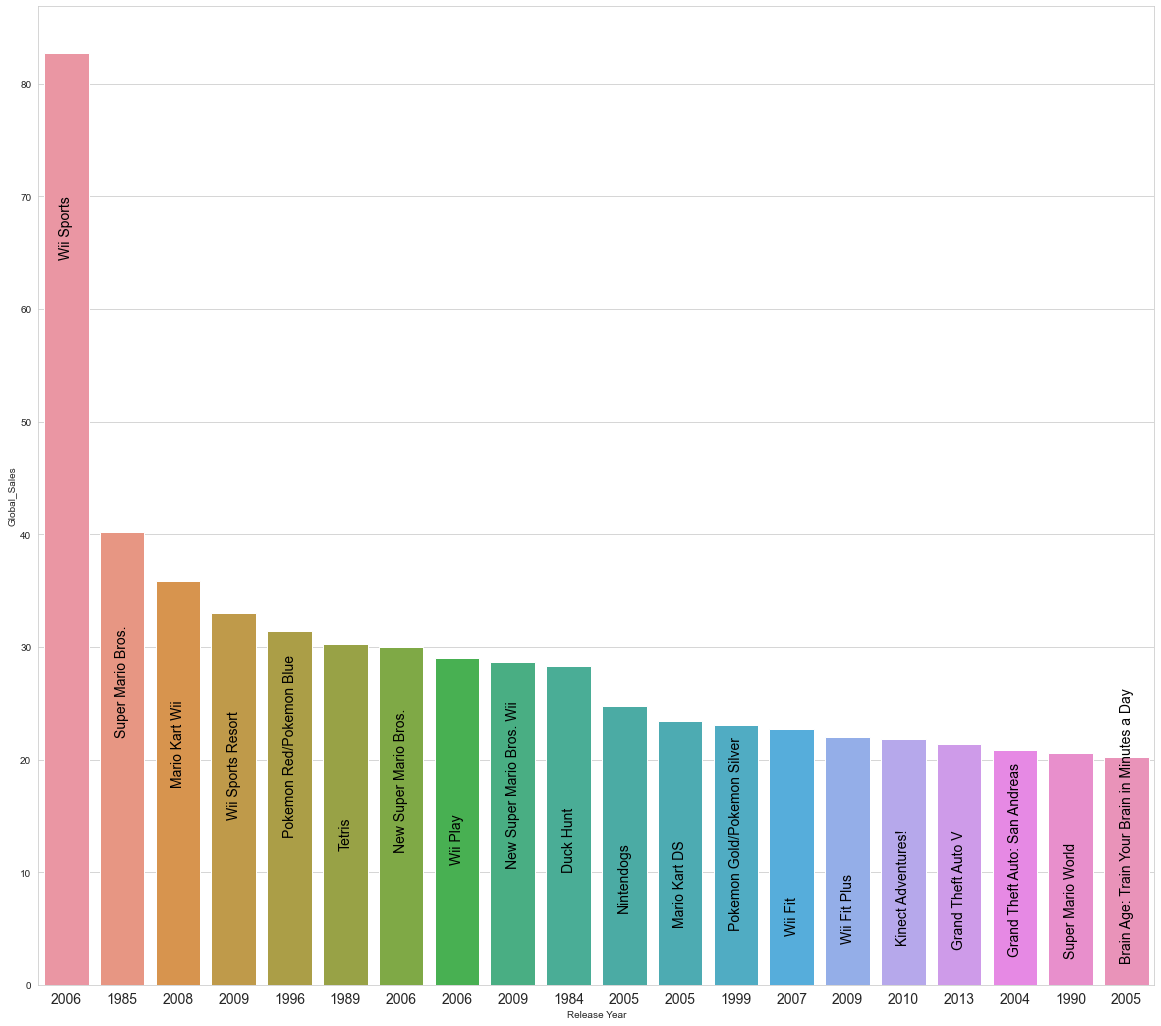

In [27]:
plt.figure(figsize=(20, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
for count, value in enumerate(top_game_sale['Global_Sales']):
    g.text(count, value - 18, name[count], color='#000', size=14, rotation= 90, ha="center")

plt.xticks(y, year, fontsize=14)
plt.xlabel('Release Year')
plt.show()

# Sales comparison by genre

In [28]:
comp_genre = data_cln[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

In [29]:
comp_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.90,510.12,152.86,183.09
Adventure,101.59,63.35,51.04,16.59
Fighting,219.14,98.85,86.51,35.73
Misc,396.70,211.68,105.86,73.89
Platform,445.20,199.78,130.54,51.20
Puzzle,122.01,50.52,56.68,12.47
Racing,356.60,235.17,56.60,76.49
Role-Playing,325.11,186.28,346.62,58.94
Shooter,567.72,302.75,37.57,99.48


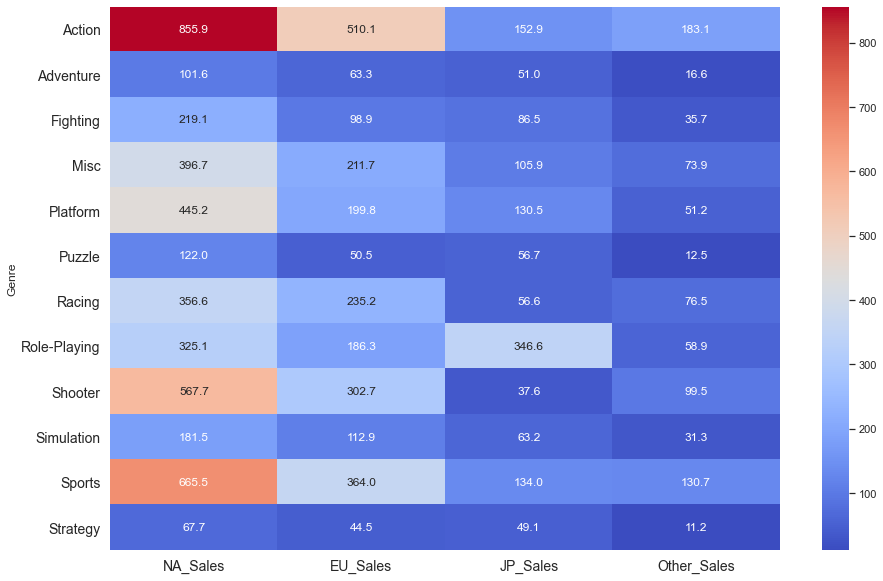

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap = 'coolwarm')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,855.90
1,Adventure,NA_Sales,101.59
2,Fighting,NA_Sales,219.14
3,Misc,NA_Sales,396.70
4,Platform,NA_Sales,445.20


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

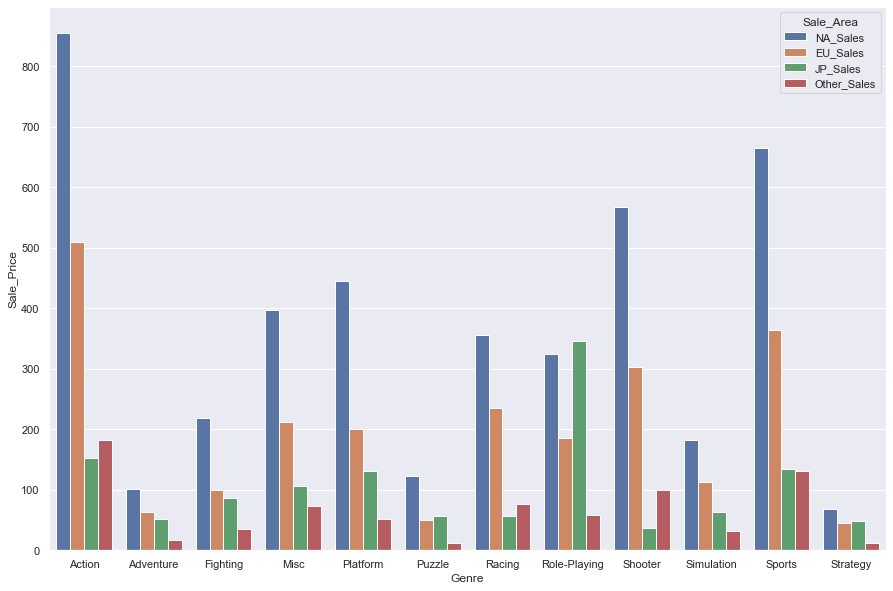

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'Genre', y = 'Sale_Price', hue = 'Sale_Area', data = comp_table)

# Sales comparison by platform

In [33]:
comp_platform = data_cln[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [34]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [35]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,77.20
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.26


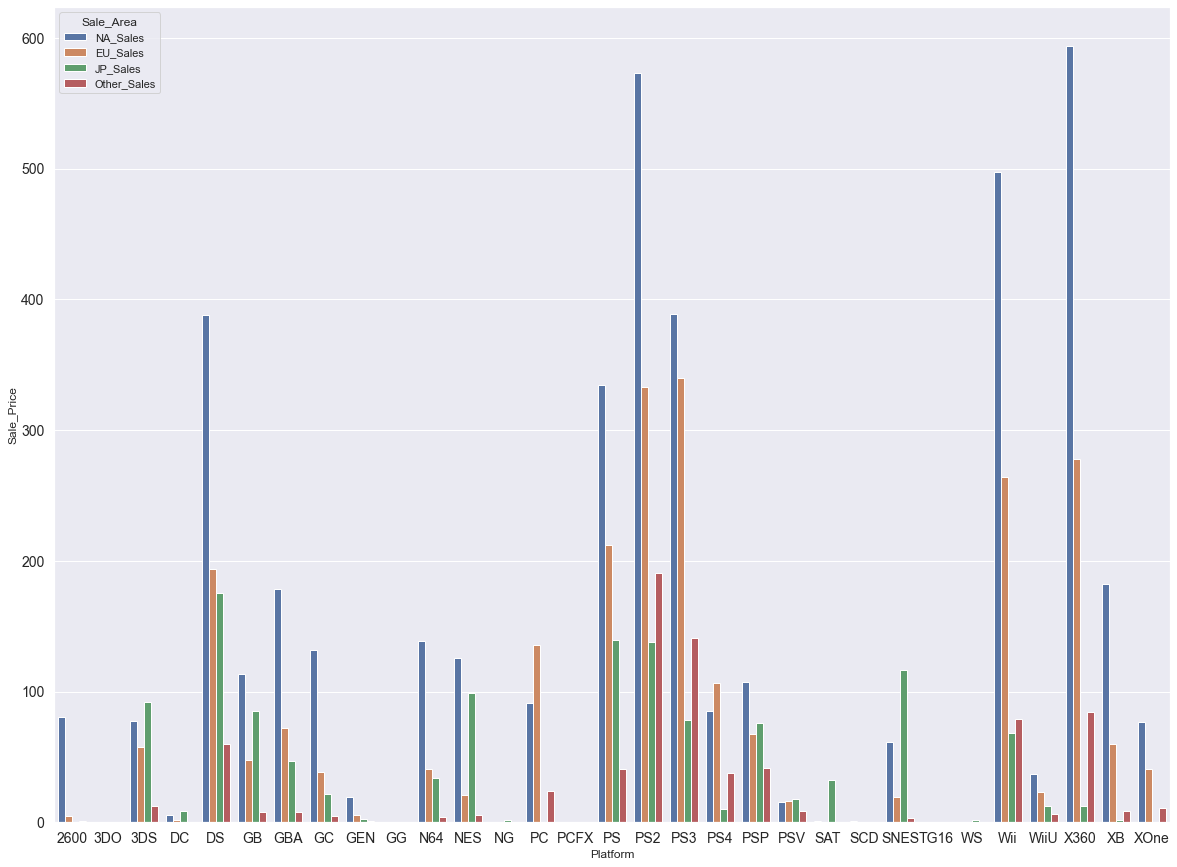

In [36]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Top 20 Publisher

In [37]:
top_publisher = data.groupby(by=['Publisher']).size().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher.columns = ['Publisher', 'Counts']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Square Enix'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, 'Eidos Interactive'),
  Text(19, 0, '505 Games')])

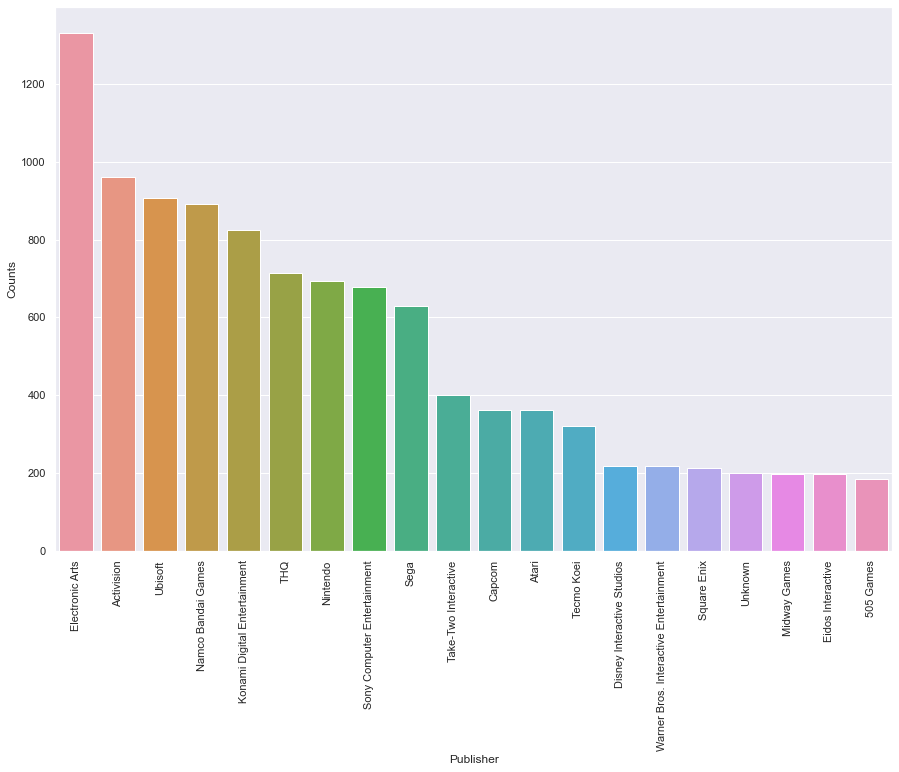

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'Publisher', y = 'Counts', data = top_publisher)
plt.xticks(rotation = 90)
#sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)

# Top global sales by publisher

In [39]:
sale_pbl = data_cln[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

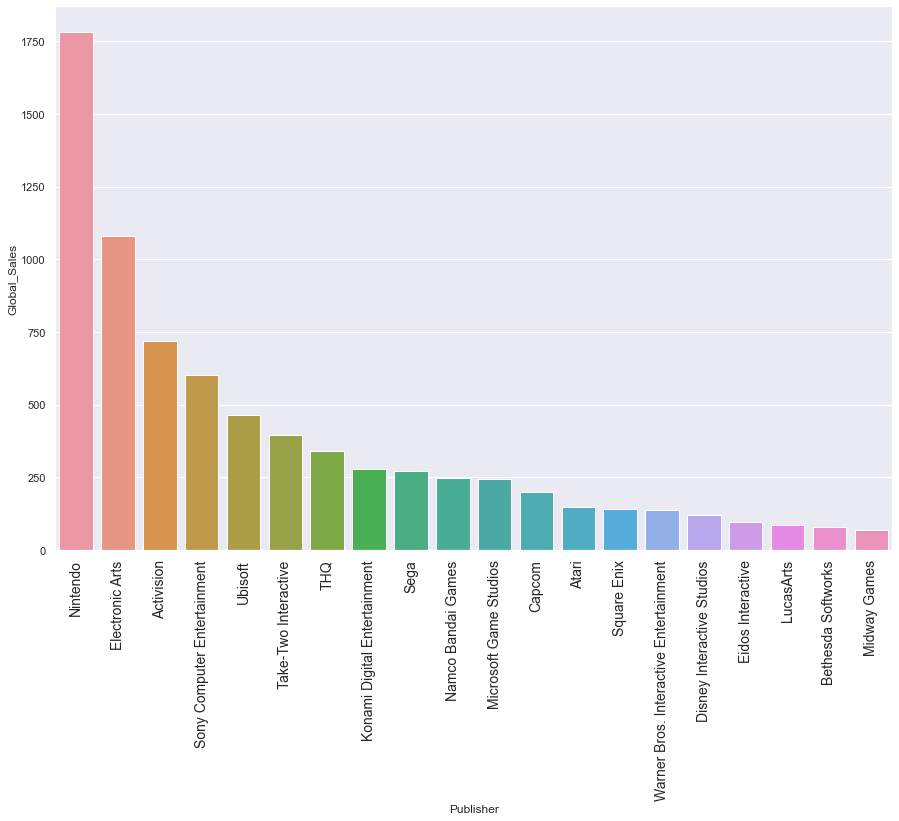

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(fontsize = 14, rotation=90)

# Publisher comparison

In [41]:
comp_publisher = data_cln[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
# comp_publisher

In [43]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,814.59
1,Electronic Arts,NA_Sales,580.58
2,Activision,NA_Sales,424.34
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,248.69
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.15
76,Eidos Interactive,Other_Sales,7.90
77,LucasArts,Other_Sales,10.28
78,Bethesda Softworks,Other_Sales,9.81


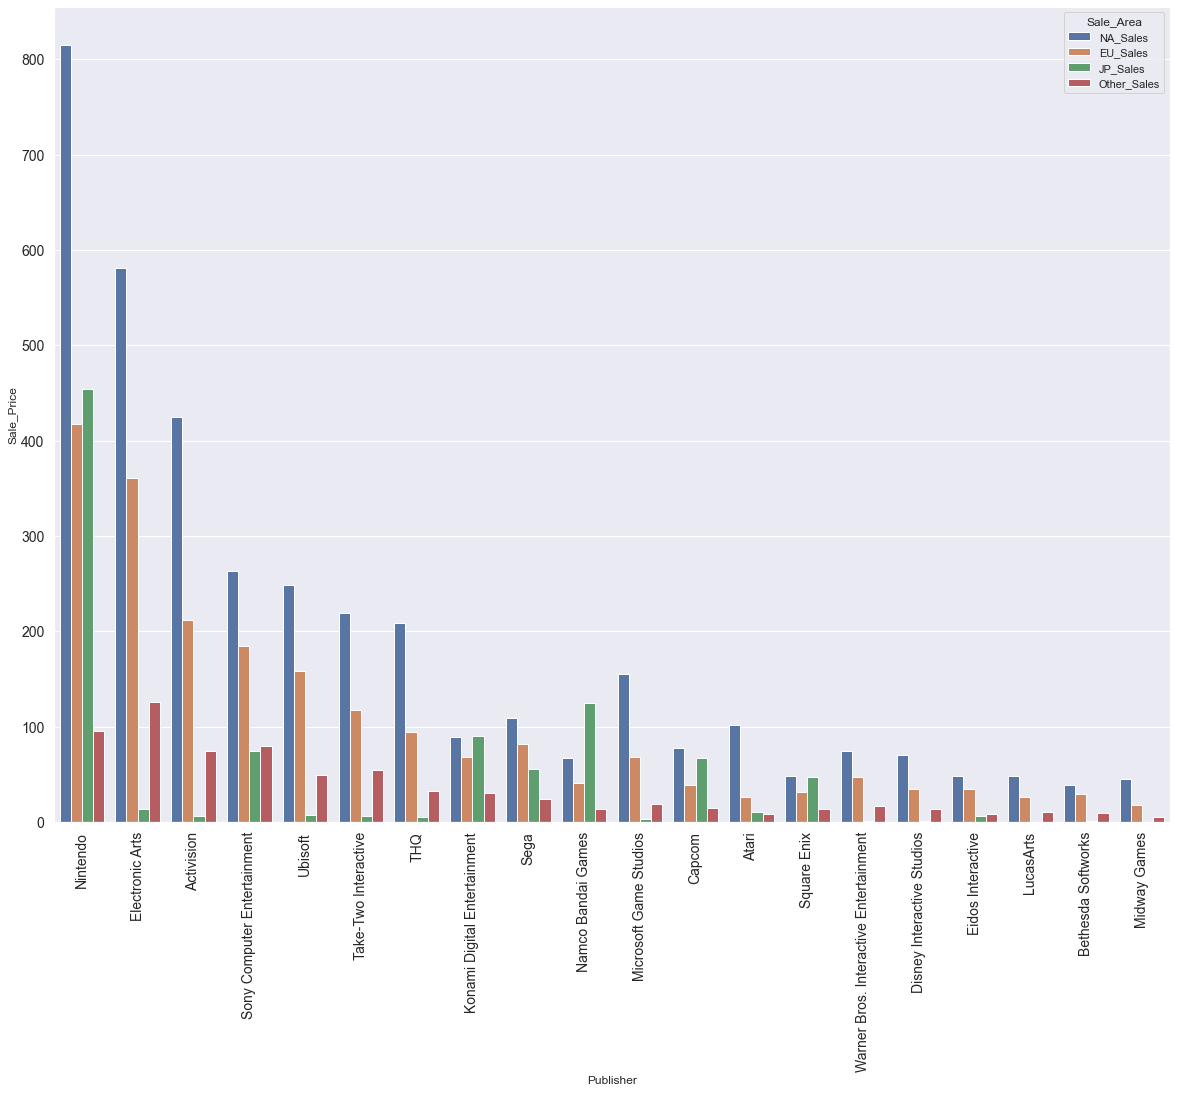

In [44]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# Top publisher by Count each year

In [45]:
top_publisher =  data_cln[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [46]:
publisher= top_publisher_count['Publisher']

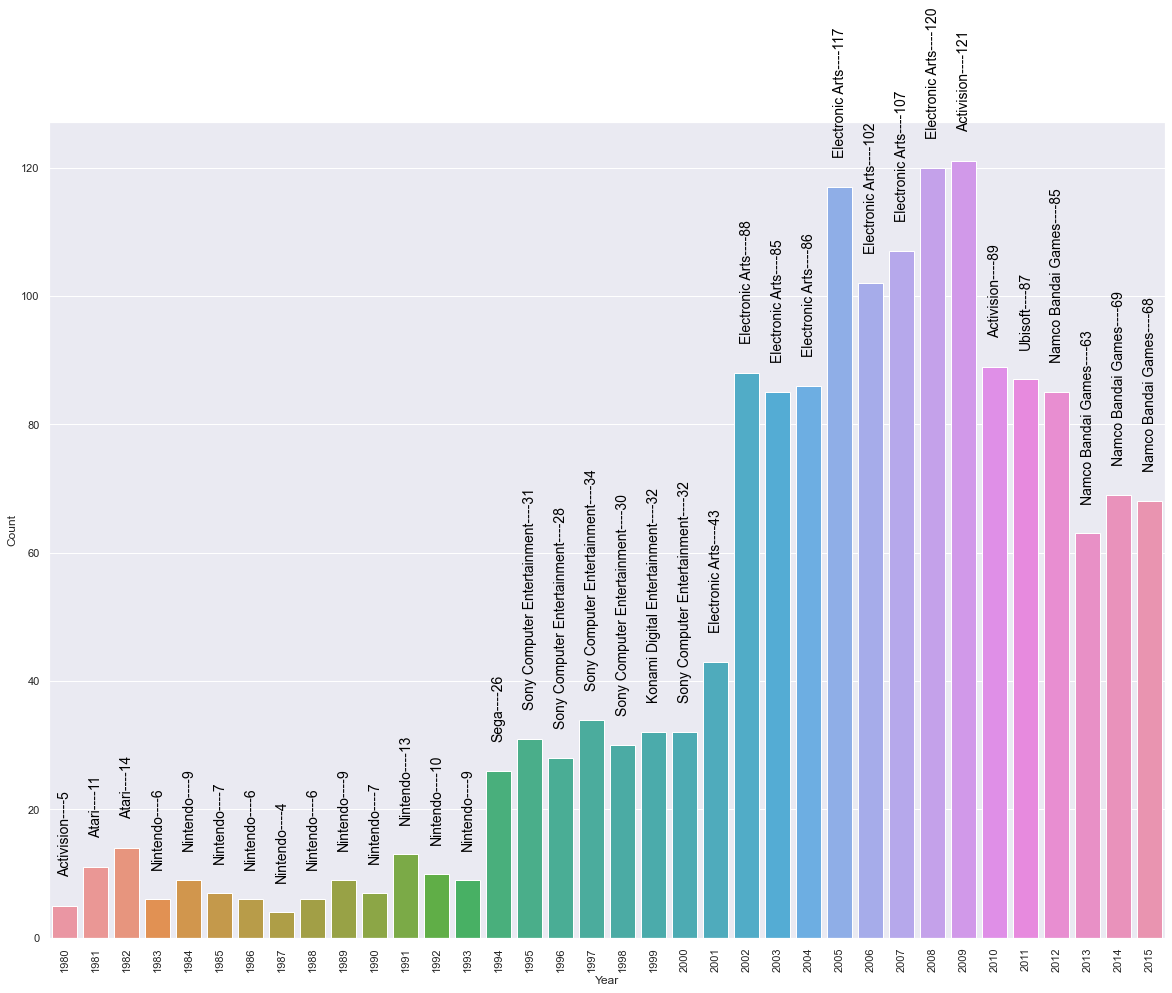

In [47]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
#index = 0
for count, value in enumerate(top_publisher_count['Count'].values):
#     print(asd)
    g.text(count, value + 5, str(publisher[count] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    #index += 1




plt.xticks(rotation=90)
plt.show()

# Total revenue by region

In [48]:
top_sale_reg = data_cln[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4304.72
1,EU_Sales,2379.93
2,JP_Sales,1270.55
3,Other_Sales,781.14


<AxesSubplot:xlabel='region', ylabel='sale'>

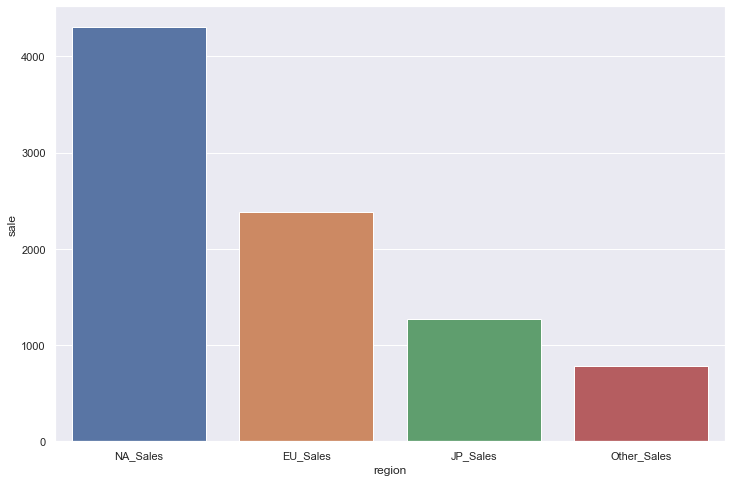

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [50]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x1e570749670>,
 [Text(-1.0997136849504432, 0.02509603818768038, 'NA_Sales'),
  Text(0.7968607384711724, -0.7582960922246519, 'EU_Sales'),
  Text(0.9365621291923075, 0.5769327327884697, 'JP_Sales'),
  Text(0.30494053449515507, 1.05688753915533, 'Other_Sales')],
 [Text(-0.5998438281547872, 0.013688748102371114, '49.3%'),
  Text(0.43465131189336675, -0.4136160503043555, '27.2%'),
  Text(0.5108520704685313, 0.3146905815209834, '14.5%'),
  Text(0.16633120063372095, 0.5764841122665436, '8.9%')])

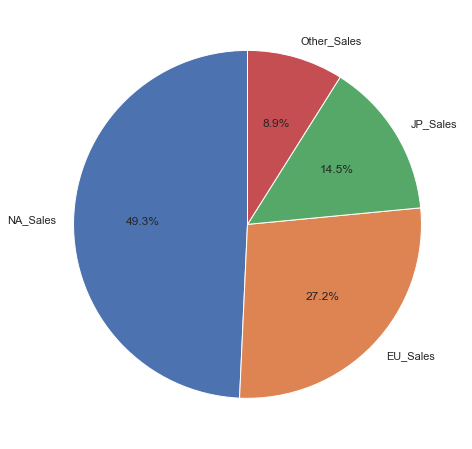

In [51]:

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

# Sales Histogram

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

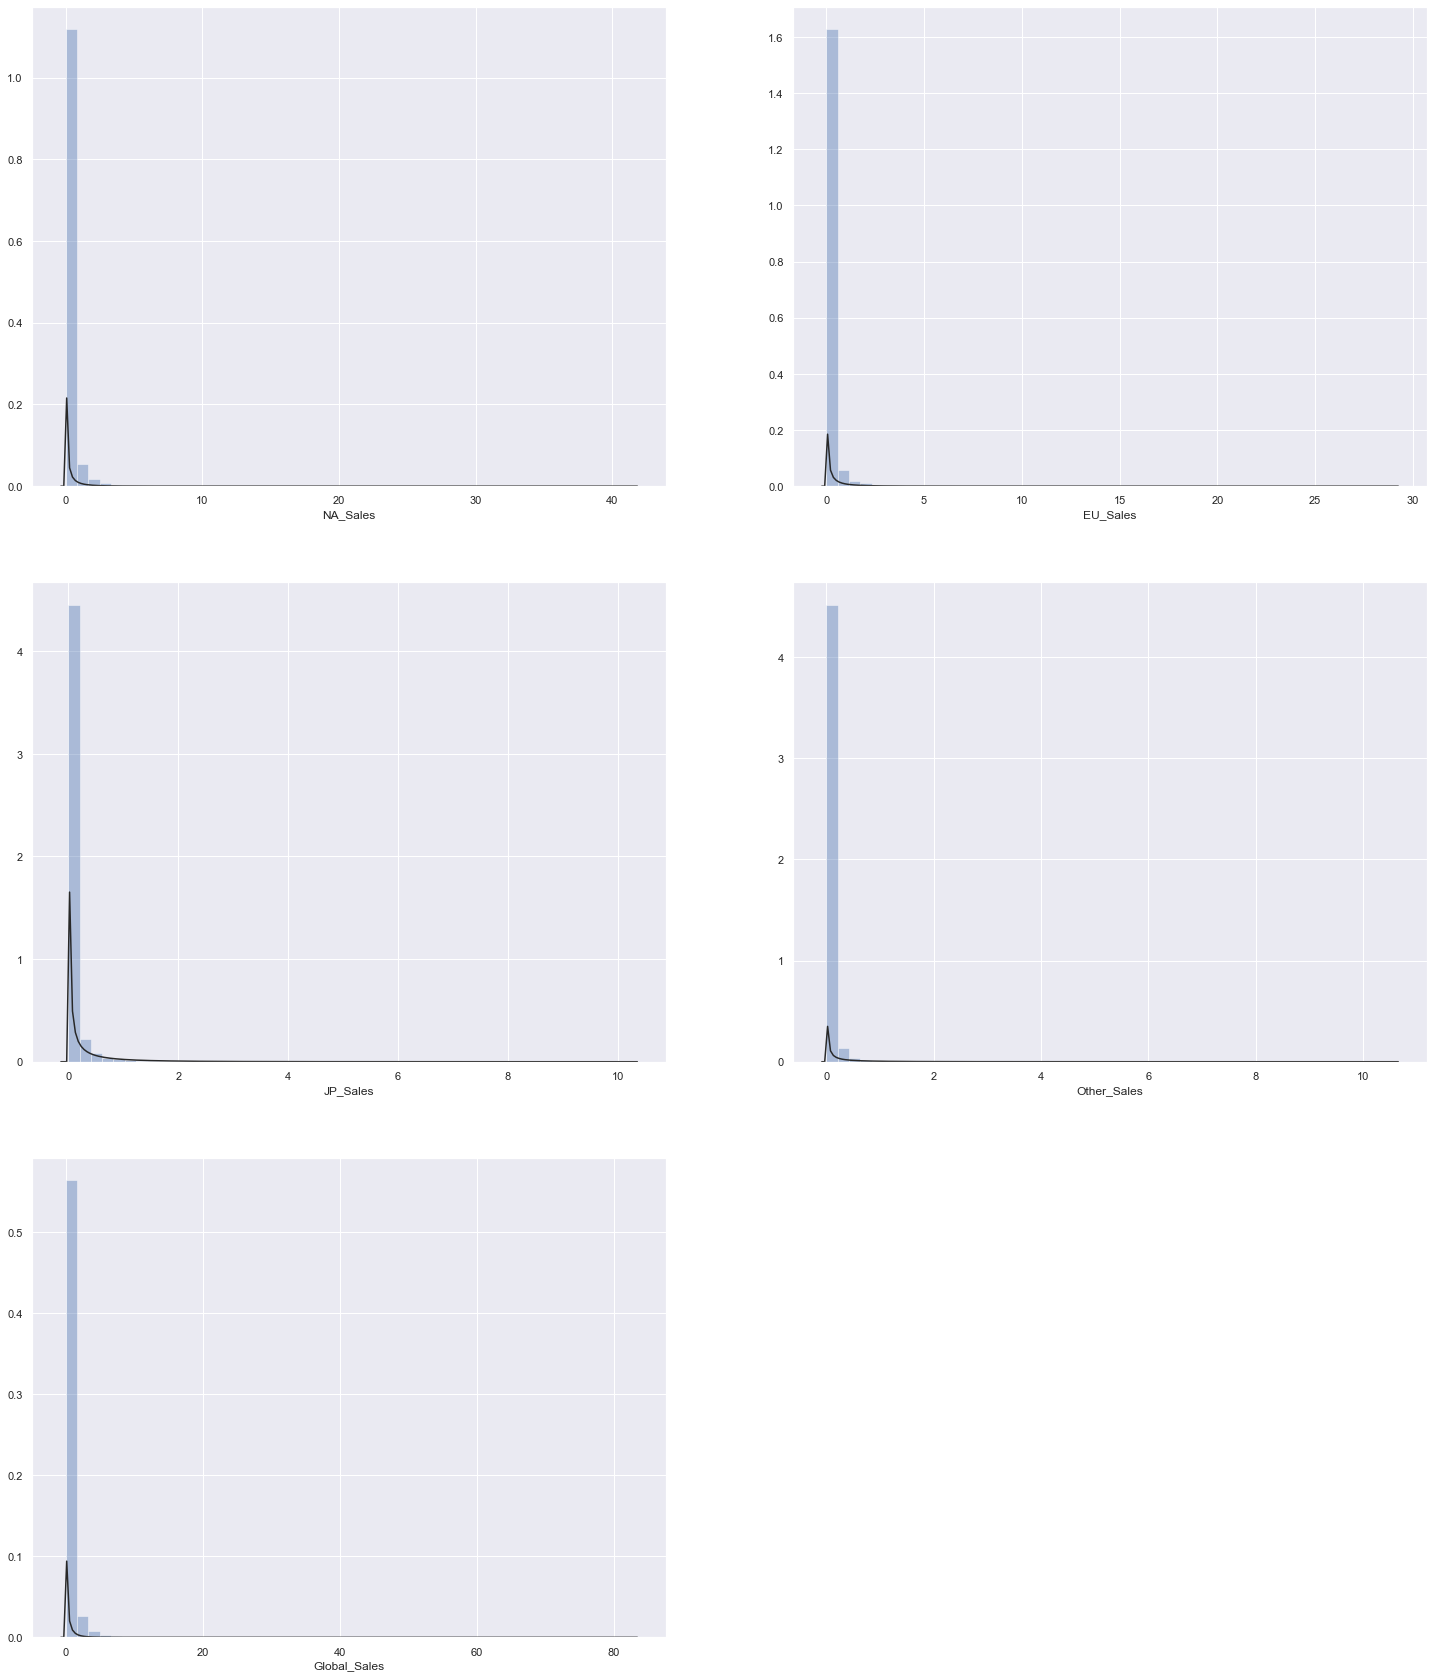

In [52]:
# sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
# sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data_cln[column], bins=50, kde=False, fit=stats.gamma)

# Distribution After log transformation

In [53]:
data_hist_log = data.copy()

In [54]:
data_hist_log = data_hist_log[data_hist_log['NA_Sales'] != 0]
data_hist_log = data_hist_log[data_hist_log['EU_Sales'] != 0]
data_hist_log = data_hist_log[data_hist_log['Other_Sales'] != 0]
data_hist_log = data_hist_log[data_hist_log['JP_Sales'] != 0]
data_hist_log = data_hist_log[data_hist_log['Global_Sales'] != 0]

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

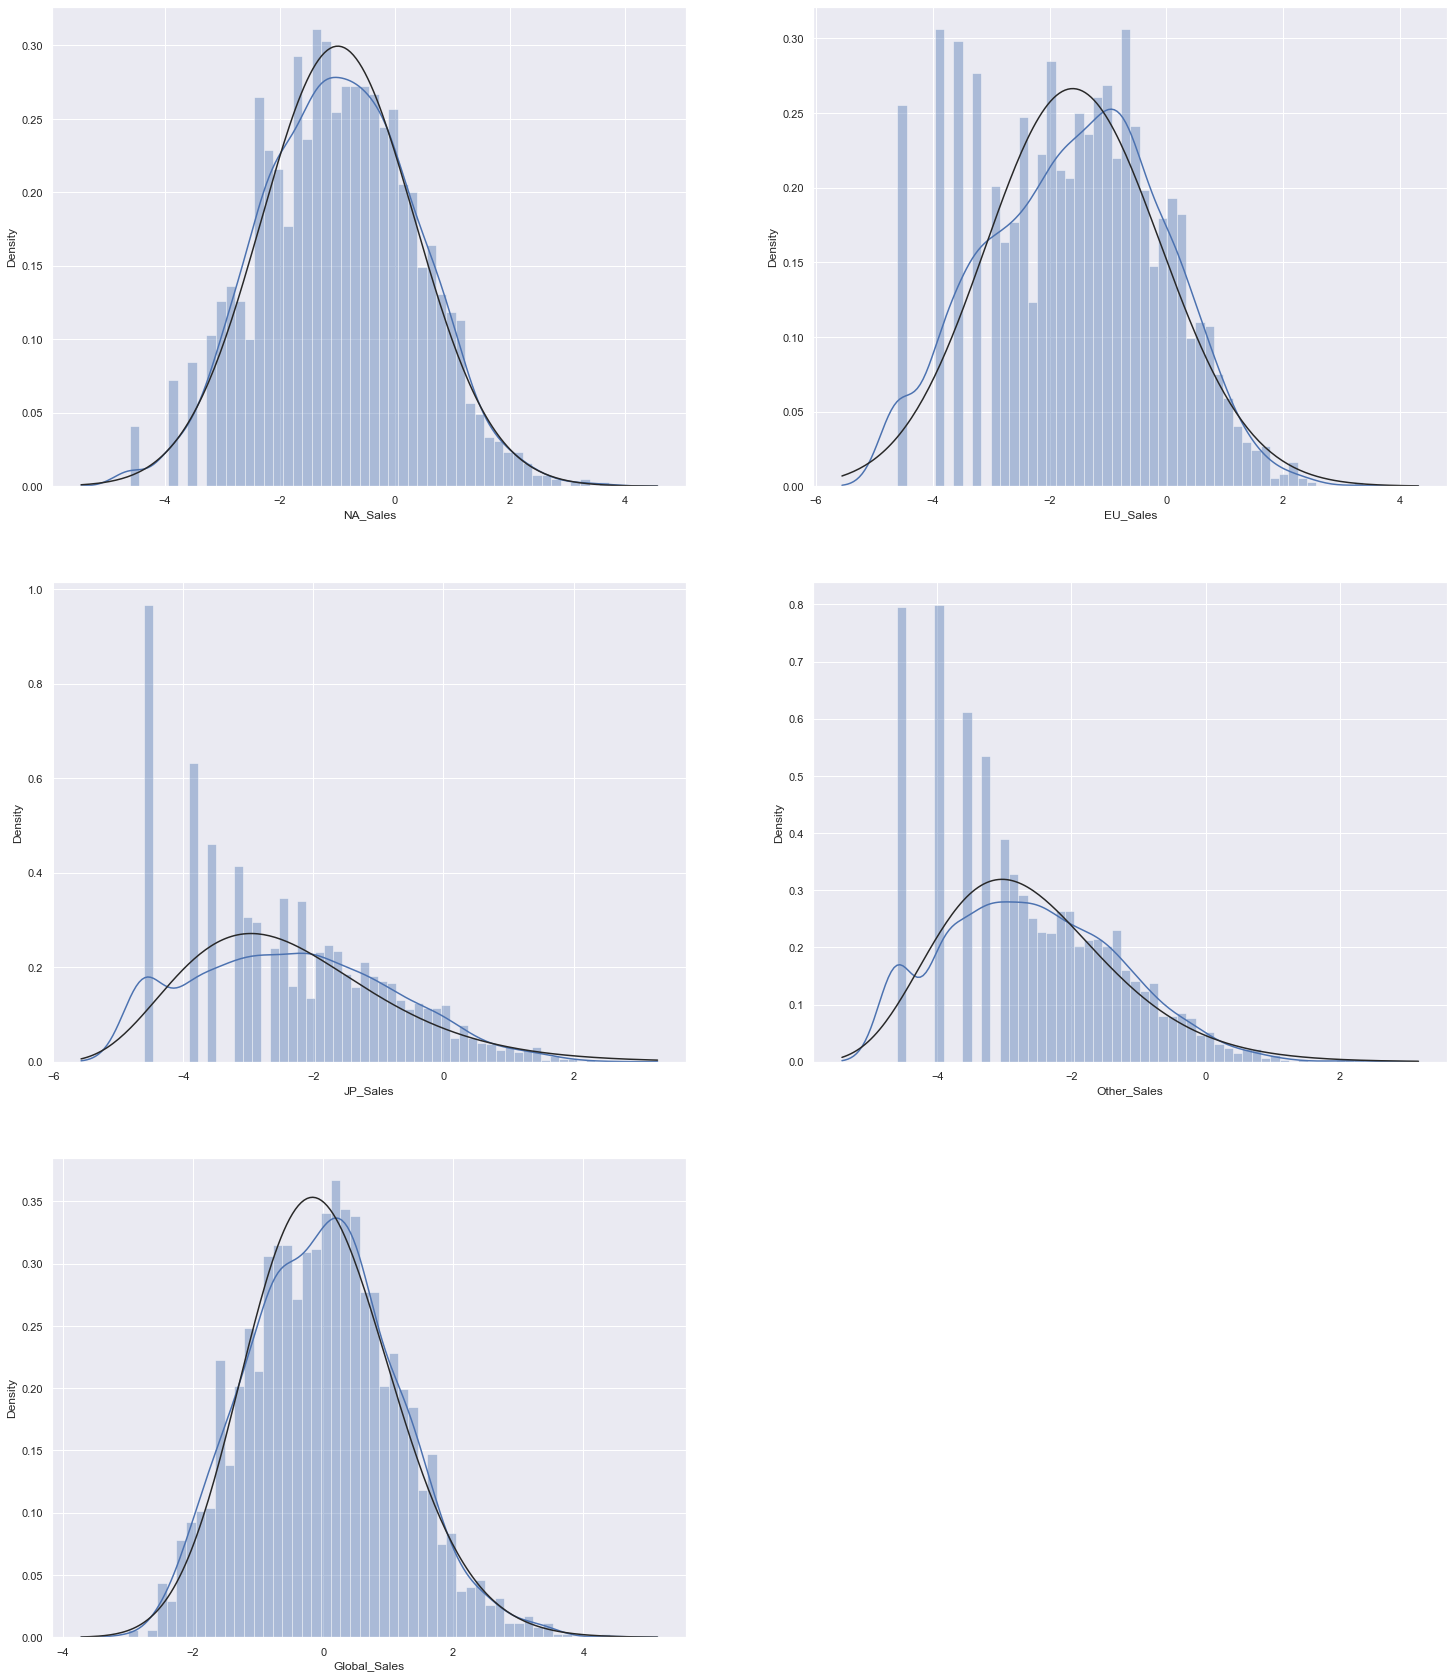

In [55]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=50, kde=True, fit=stats.gamma)

# Relations of columns

<AxesSubplot:>

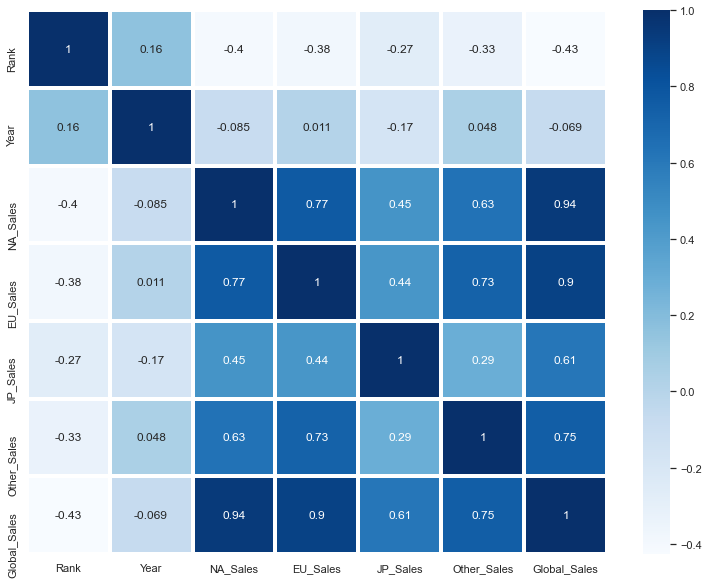

In [56]:
plt.figure(figsize=(13,10))
sns.heatmap(data_cln.corr(), cmap = "Blues", annot=True, linewidth=3)

## Pairplot

In [57]:
data_pair = data_cln.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


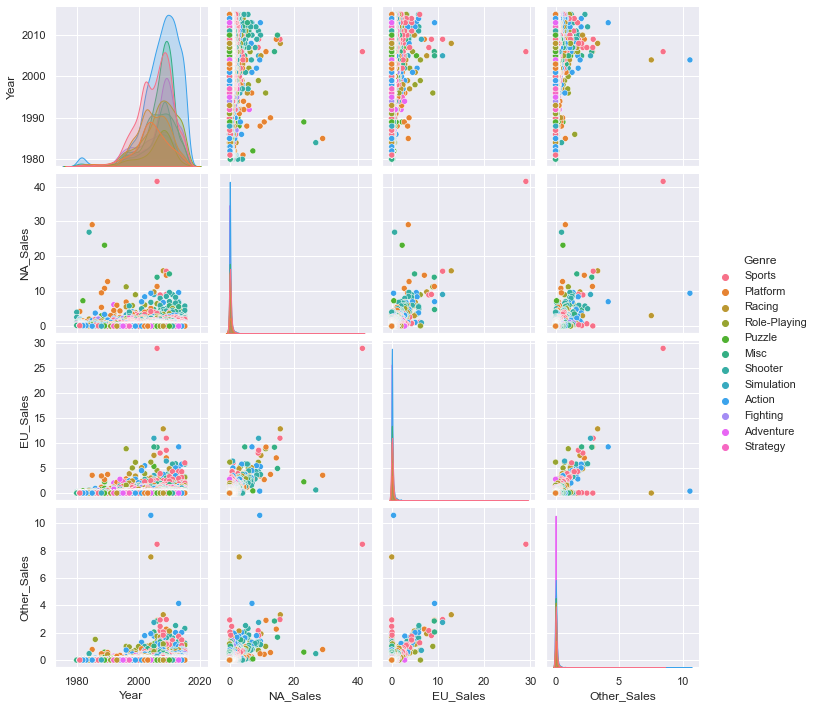

In [58]:
sns.pairplot(data_pair, hue='Genre')

## Pairplot log

In [59]:
data_pair_log = data_pair.copy()

In [60]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [61]:
data_pair_log = data_pair_log[data_pair_log['NA_Sales'] != 0]
data_pair_log = data_pair_log[data_pair_log['EU_Sales'] != 0]
data_pair_log = data_pair_log[data_pair_log['Other_Sales'] != 0]

In [62]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998,PC,Role-Playing,0.01,0.02,0.01
14183,2014,PS3,Racing,0.02,0.01,0.01
14185,2011,PC,Puzzle,0.01,0.02,0.01
14267,2007,PC,Puzzle,0.01,0.02,0.01


In [63]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

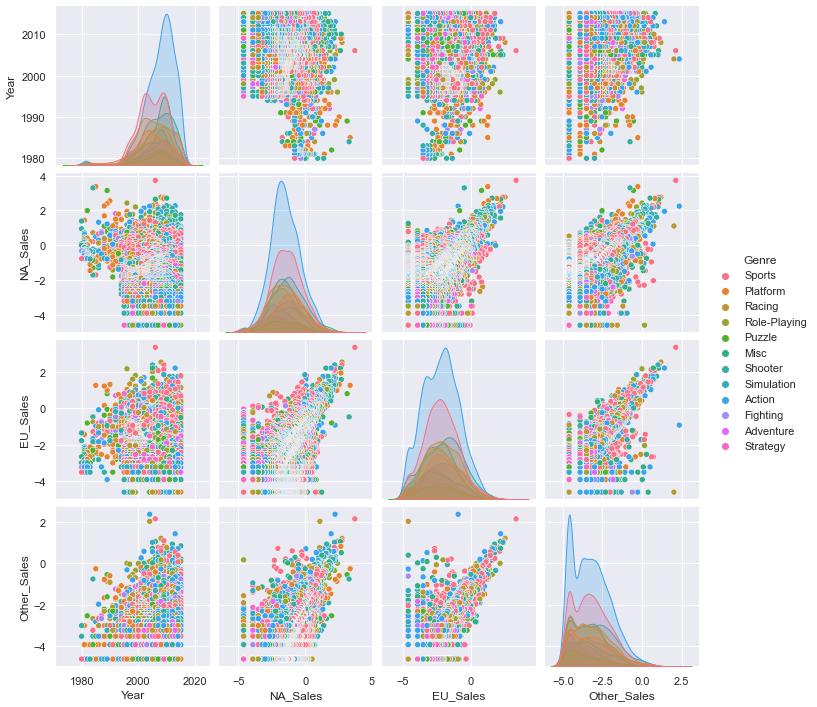

In [64]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")